In [1]:
%matplotlib inline
#
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import random as rng
import skimage
import ipywidgets as widgets
from PIL import Image, ImageDraw, ImageFont
from matplotlib.pyplot import figure, subplot
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from skimage import data, exposure, io, filters, feature, measure
from skimage.color import rgb2gray

In [2]:
class Load:
    
    def __init__(self):
        return
    
    def imgcv(file):
        img = cv.imread("../res/"+file+".jpg")
        return img
    def imgio(file):
        img = io.imread('../res/'+file+'.jpg', 0)
        return img

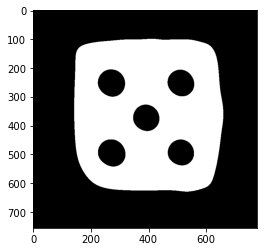

In [3]:
latwe0 = Load.imgcv("latwe0")
latwe0_grayscale = cv.cvtColor(latwe0, cv.COLOR_RGB2GRAY)

blur = skimage.filters.gaussian(latwe0_grayscale, sigma=20)
thresh = skimage.filters.threshold_otsu(blur)
mask = (blur > thresh)
latwe0_normalized = mask.astype(np.uint8)
plt.imshow(latwe0_normalized, cmap='gray')

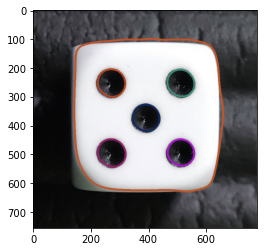

In [4]:
contours, hierarchy = cv.findContours(latwe0_normalized, cv.RETR_TREE, cv.CHAIN_APPROX_NONE) 
drawing = np.zeros((latwe0_normalized.shape[0], latwe0_normalized.shape[1], 3), dtype=np.uint8)
for i in range(len(contours)):
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    cv.drawContours(latwe0, contours, i, color, 5, cv.LINE_8, hierarchy, 0)
plt.imshow(latwe0, cmap='gray')

In [5]:
max_contour = 0
oczka = []
for i in contours:
    if cv.contourArea(i) > max_contour:
        max_contour = cv.contourArea(i)
for i in contours:
    if cv.contourArea(i) != max_contour:
        oczka.append(i)

print(len(oczka))

5


In [6]:
def zoom(image,dst):

    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    blur = cv.medianBlur(gray, 5)
    sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    sharpen = cv.filter2D(blur, -1, sharpen_kernel)
    thresh = cv.threshold(sharpen,dst,255, cv.THRESH_BINARY_INV)[1]
    kernel = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
    close = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel, iterations=2)
    
    cnts = cv.findContours(close, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    min_area = 0
    max_area = 10000
    fields = []
    
    for c in cnts:
        area = cv.contourArea(c)
        fields.append(area)
    check = True

    if check:
        index = fields.index(max(fields))
        del cnts[index]
        del fields[index]
        biggest = max(fields)
        image_number = 0

    fields2 = fields.copy()
    dlugosc = len(fields2)
    i = 0
    while(i < dlugosc):
        if fields2[i] < max(fields2)//2:
            del fields2[i]
            del cnts[i]
            dlugosc-=1
        else:
            i+=1
    
    zooms = []
    for i, j in zip(cnts, fields2):
        if j > biggest - 10000:
            x,y,w,h = cv.boundingRect(i)
            zoom = image[y:y+h, x:x+h]
            #cv.imwrite('zoom_{}.png'.format(image_number), zoom)
            #cv.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2) #rysowanie gownokwadratow
            zooms.append(zoom)
            image_number += 1
    return zooms

In [7]:
#15.11.2020 edit BY JEDRZEJ!!!

In [29]:
def saveZoom(img, dst, i):
    if i == 8:
        #ax = subplot(3,3,i)
        #ax.tick_params(direction='in',labelleft=False, labelbottom = False, labelright = False)
        zoomed = zoom(255 - img, dst)[0]
        plt.imshow(zoomed)
        plt.savefig("../edition/oczka{}.jpg".format(i))
    else:
        #ax = subplot(3,3,i)
        #ax.tick_params(direction='in',labelleft=False, labelbottom = False, labelright = False)
        zoomed = zoom(img, dst)[0]
        plt.imshow(zoomed)
        plt.savefig("../edition/oczka{}.jpg".format(i))
def DrawOczka(filename, z):
    img = cv.imread('../edition/{}'.format(filename), 0)
    img = cv.medianBlur(img,5)
    cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)

    circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                                param1=300,param2=25,minRadius=0,maxRadius=60)
    circles = np.uint16(np.around(circles))
    print(len(circles[0]))
    font = cv.FONT_HERSHEY_SIMPLEX
    j = 0
    print(circles)
    for i in circles[0,:]:
        # draw the outer circle
        cv.circle(cimg,(i[0],i[1]),i[2],(255,0,0),2)
        # draw the center of the circle
        #cv.circle(cimg,(i[0],i[1]),2,(255,0,0),3)
        bottomLeftCornerOfText = (i[0], i[1])
        fontScale = 1
        fontColor = (0, 255, 0)
        lineType = 2
        output = ('#{}'.format(j))
        cv.putText(cimg, output, bottomLeftCornerOfText, font, fontScale,fontColor,lineType)
        j+=1

    figure(figsize=(60,60))
    plt.imshow(cimg)
    plt.savefig("../edition/oczkaedited{}.jpg".format(z))

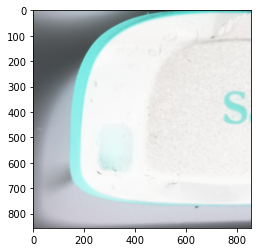

In [30]:
latwe0 = Load.imgio('latwe0')
latwe1 = Load.imgio('latwe1')
latwe2 = Load.imgio('latwe2')
latwe3 = Load.imgio('latwe3')
latwe4 = Load.imgio('latwe4')
latwe5 = Load.imgio('latwe5')
#latwe6 = Load.imgio('latwe6')
latwe7 = Load.imgio('latwe7')
latwe8 = Load.imgio('latwe8')
latwe9 = Load.imgio('latwe9')
latwe = [latwe0, latwe1, latwe2, latwe3, latwe4, latwe5, latwe7, latwe8, latwe9]
dst = [170, 170, 170, 170, 170, 100, 140, 63, 148]

for i in range(0, len(latwe)):
    saveZoom(latwe[i], dst[i], i)
    

['oczka0.jpg', 'oczka1.jpg', 'oczka2.jpg', 'oczka3.jpg', 'oczka4.jpg', 'oczka5.jpg', 'oczka6.jpg', 'oczka7.jpg', 'oczka8.jpg']
5
[[[268 196  21]
  [166  94  22]
  [268  94  21]
  [218 144  21]
  [166 196  22]]]
5
[[[216 144  21]
  [268  96  20]
  [266 196  20]
  [166 196  22]
  [166  94  22]]]
6
[[[248 110  16]
  [176  94  52]
  [302 144  20]
  [198  78  20]
  [214 152  18]
  [282  70  17]]]
5
[[[174  92  22]
  [222 144  21]
  [274  96  21]
  [270 194  20]
  [172 192  21]]]
3
[[[214 130  15]
  [264 106  14]
  [166 158  16]]]


TypeError: loop of ufunc does not support argument 0 of type NoneType which has no callable rint method

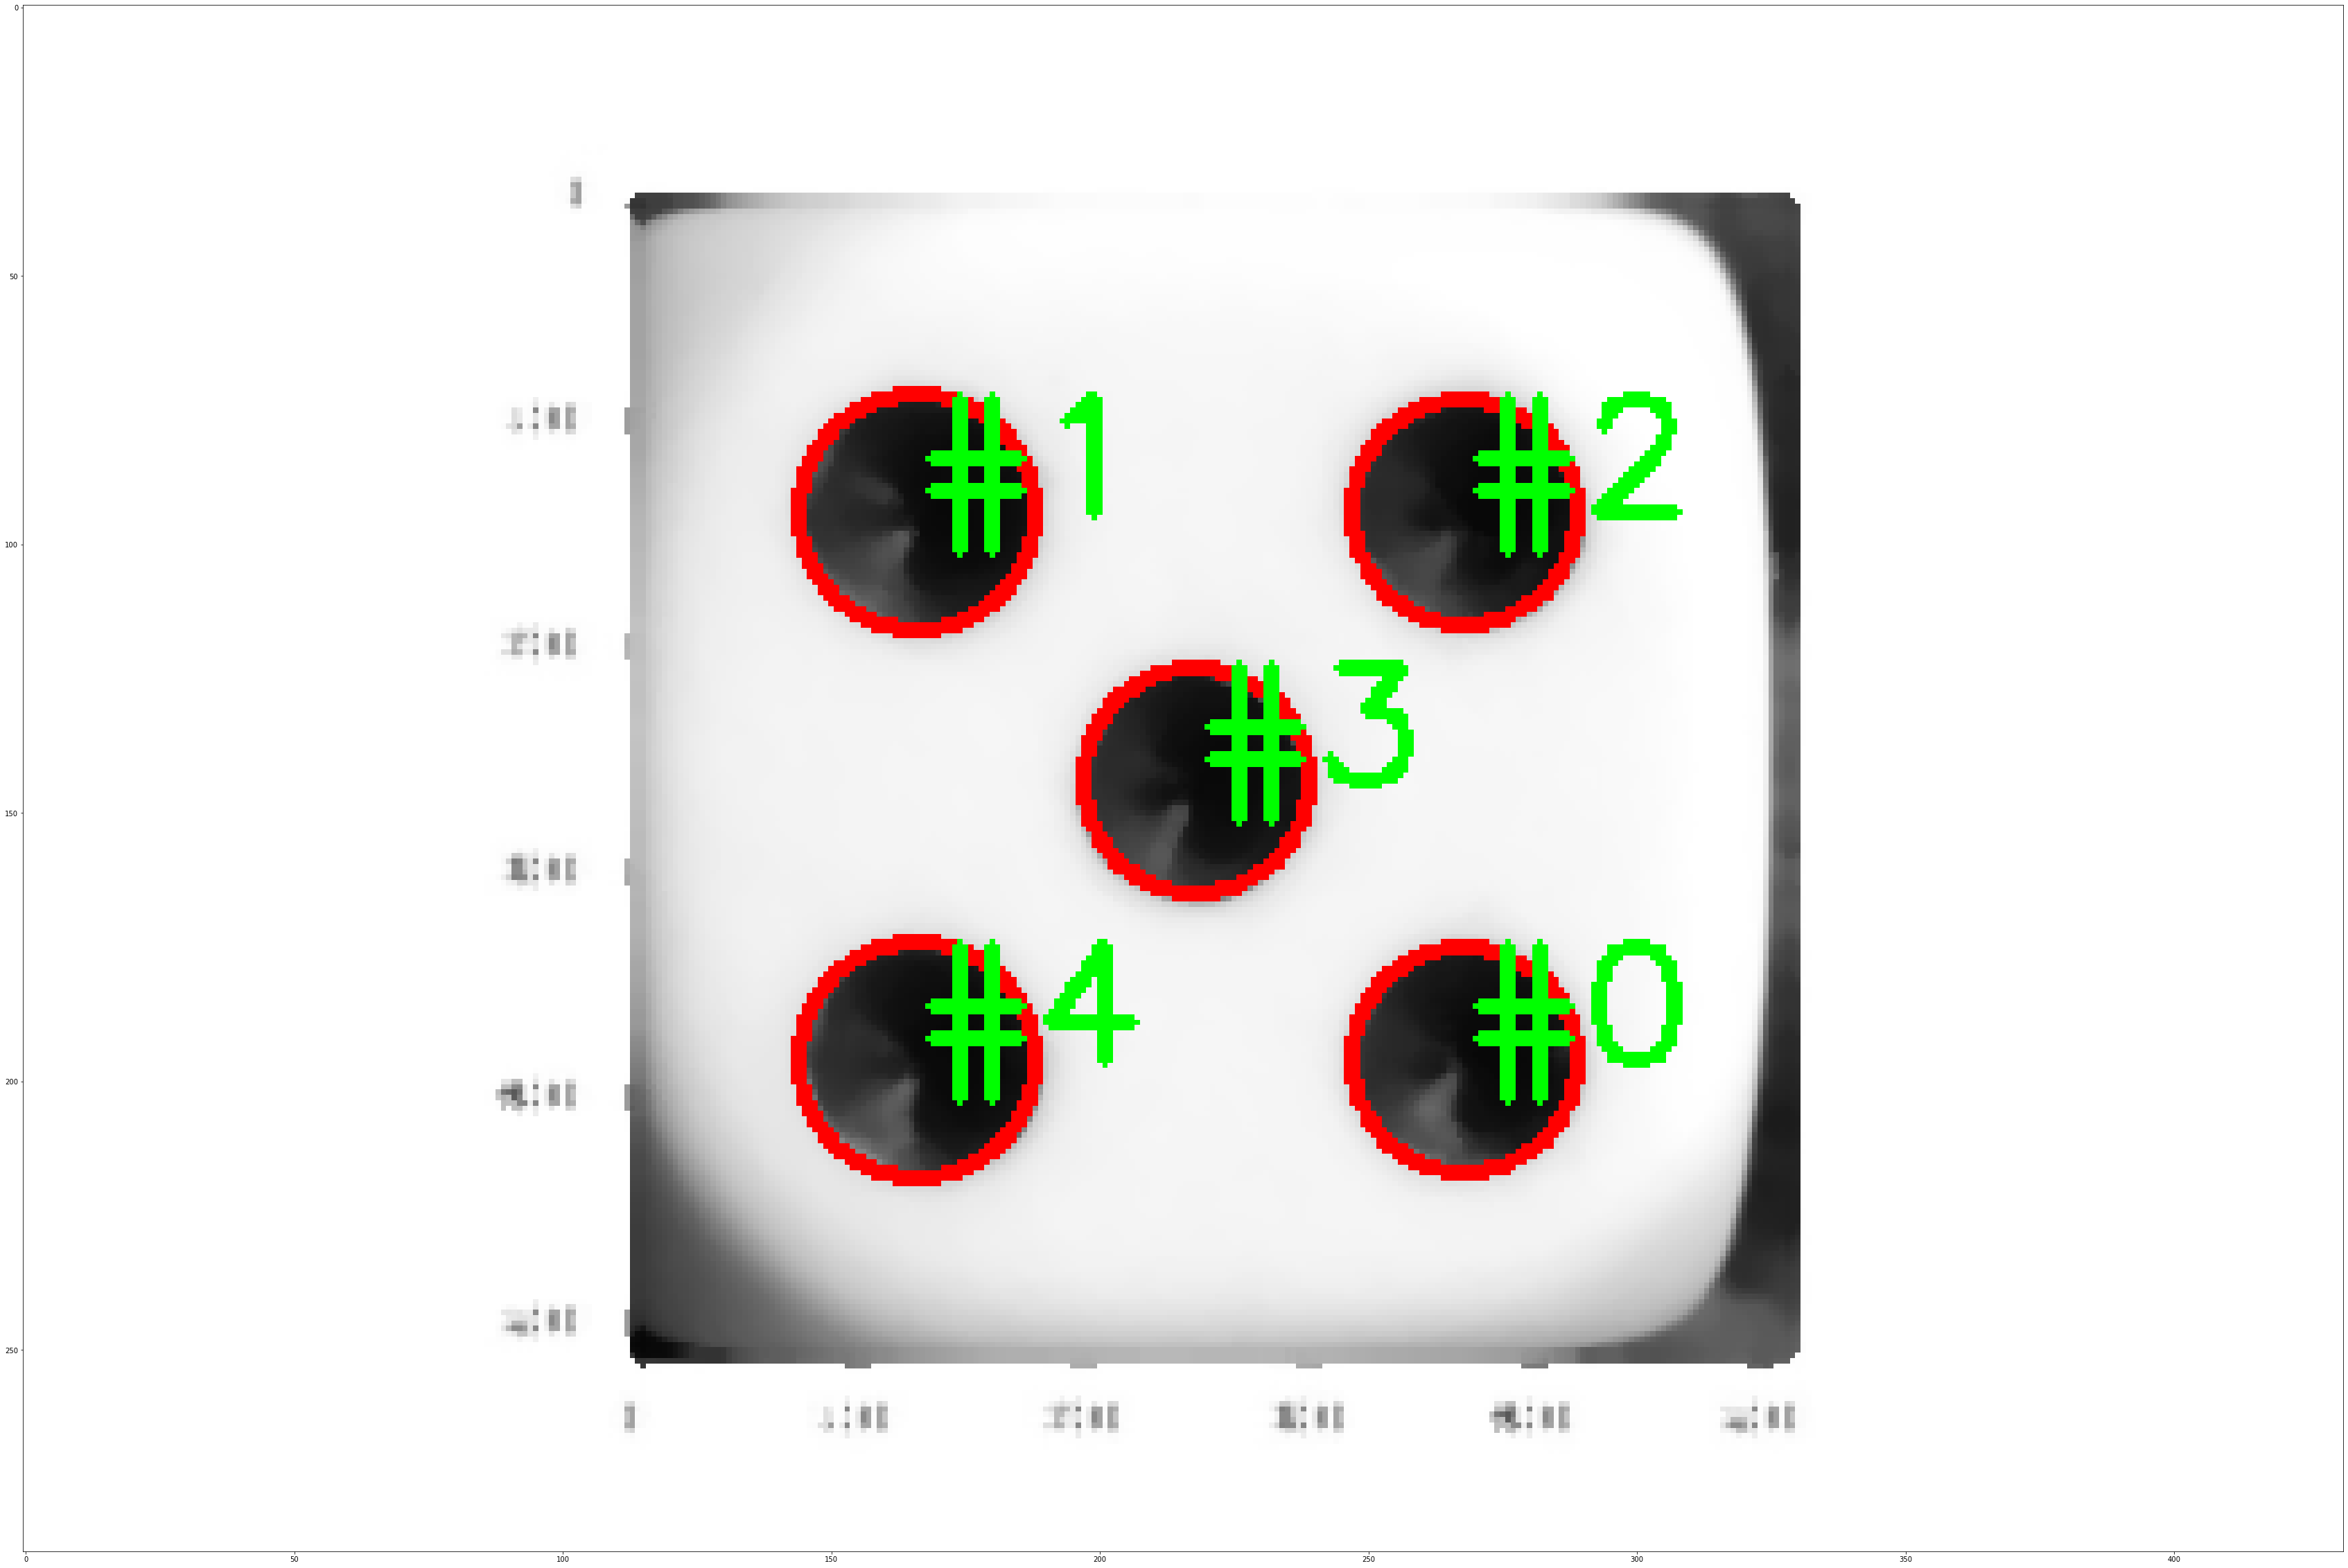

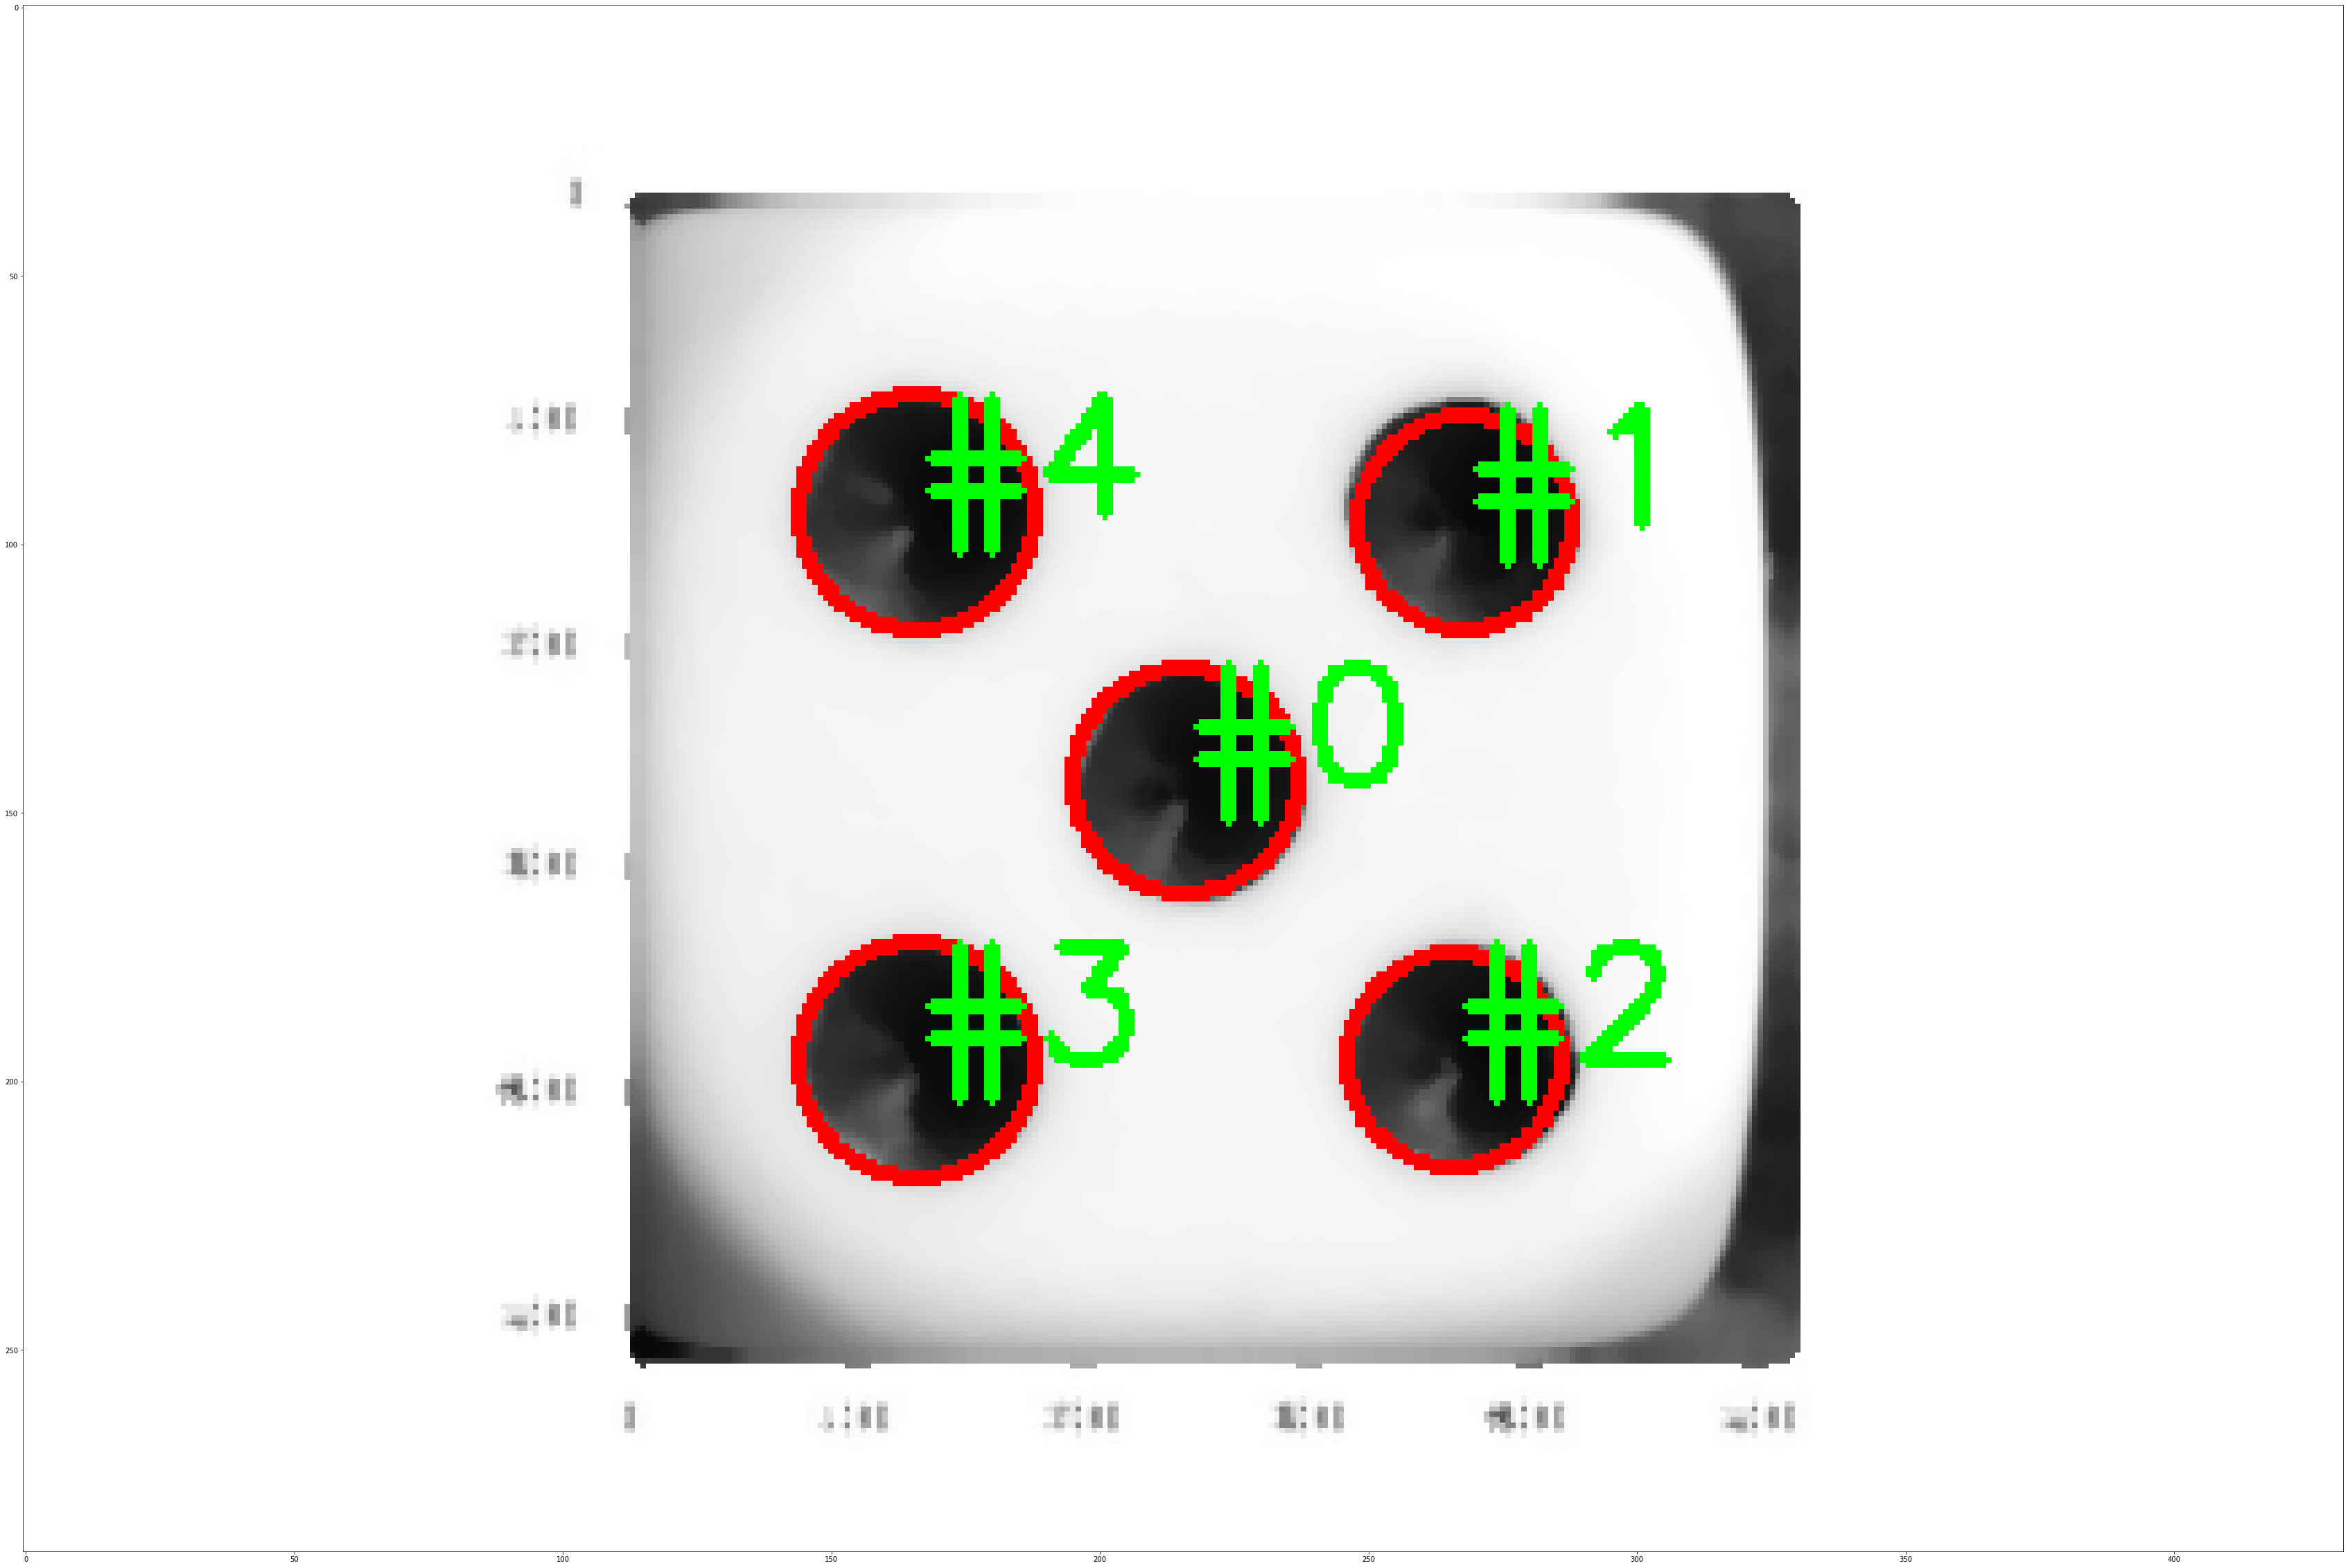

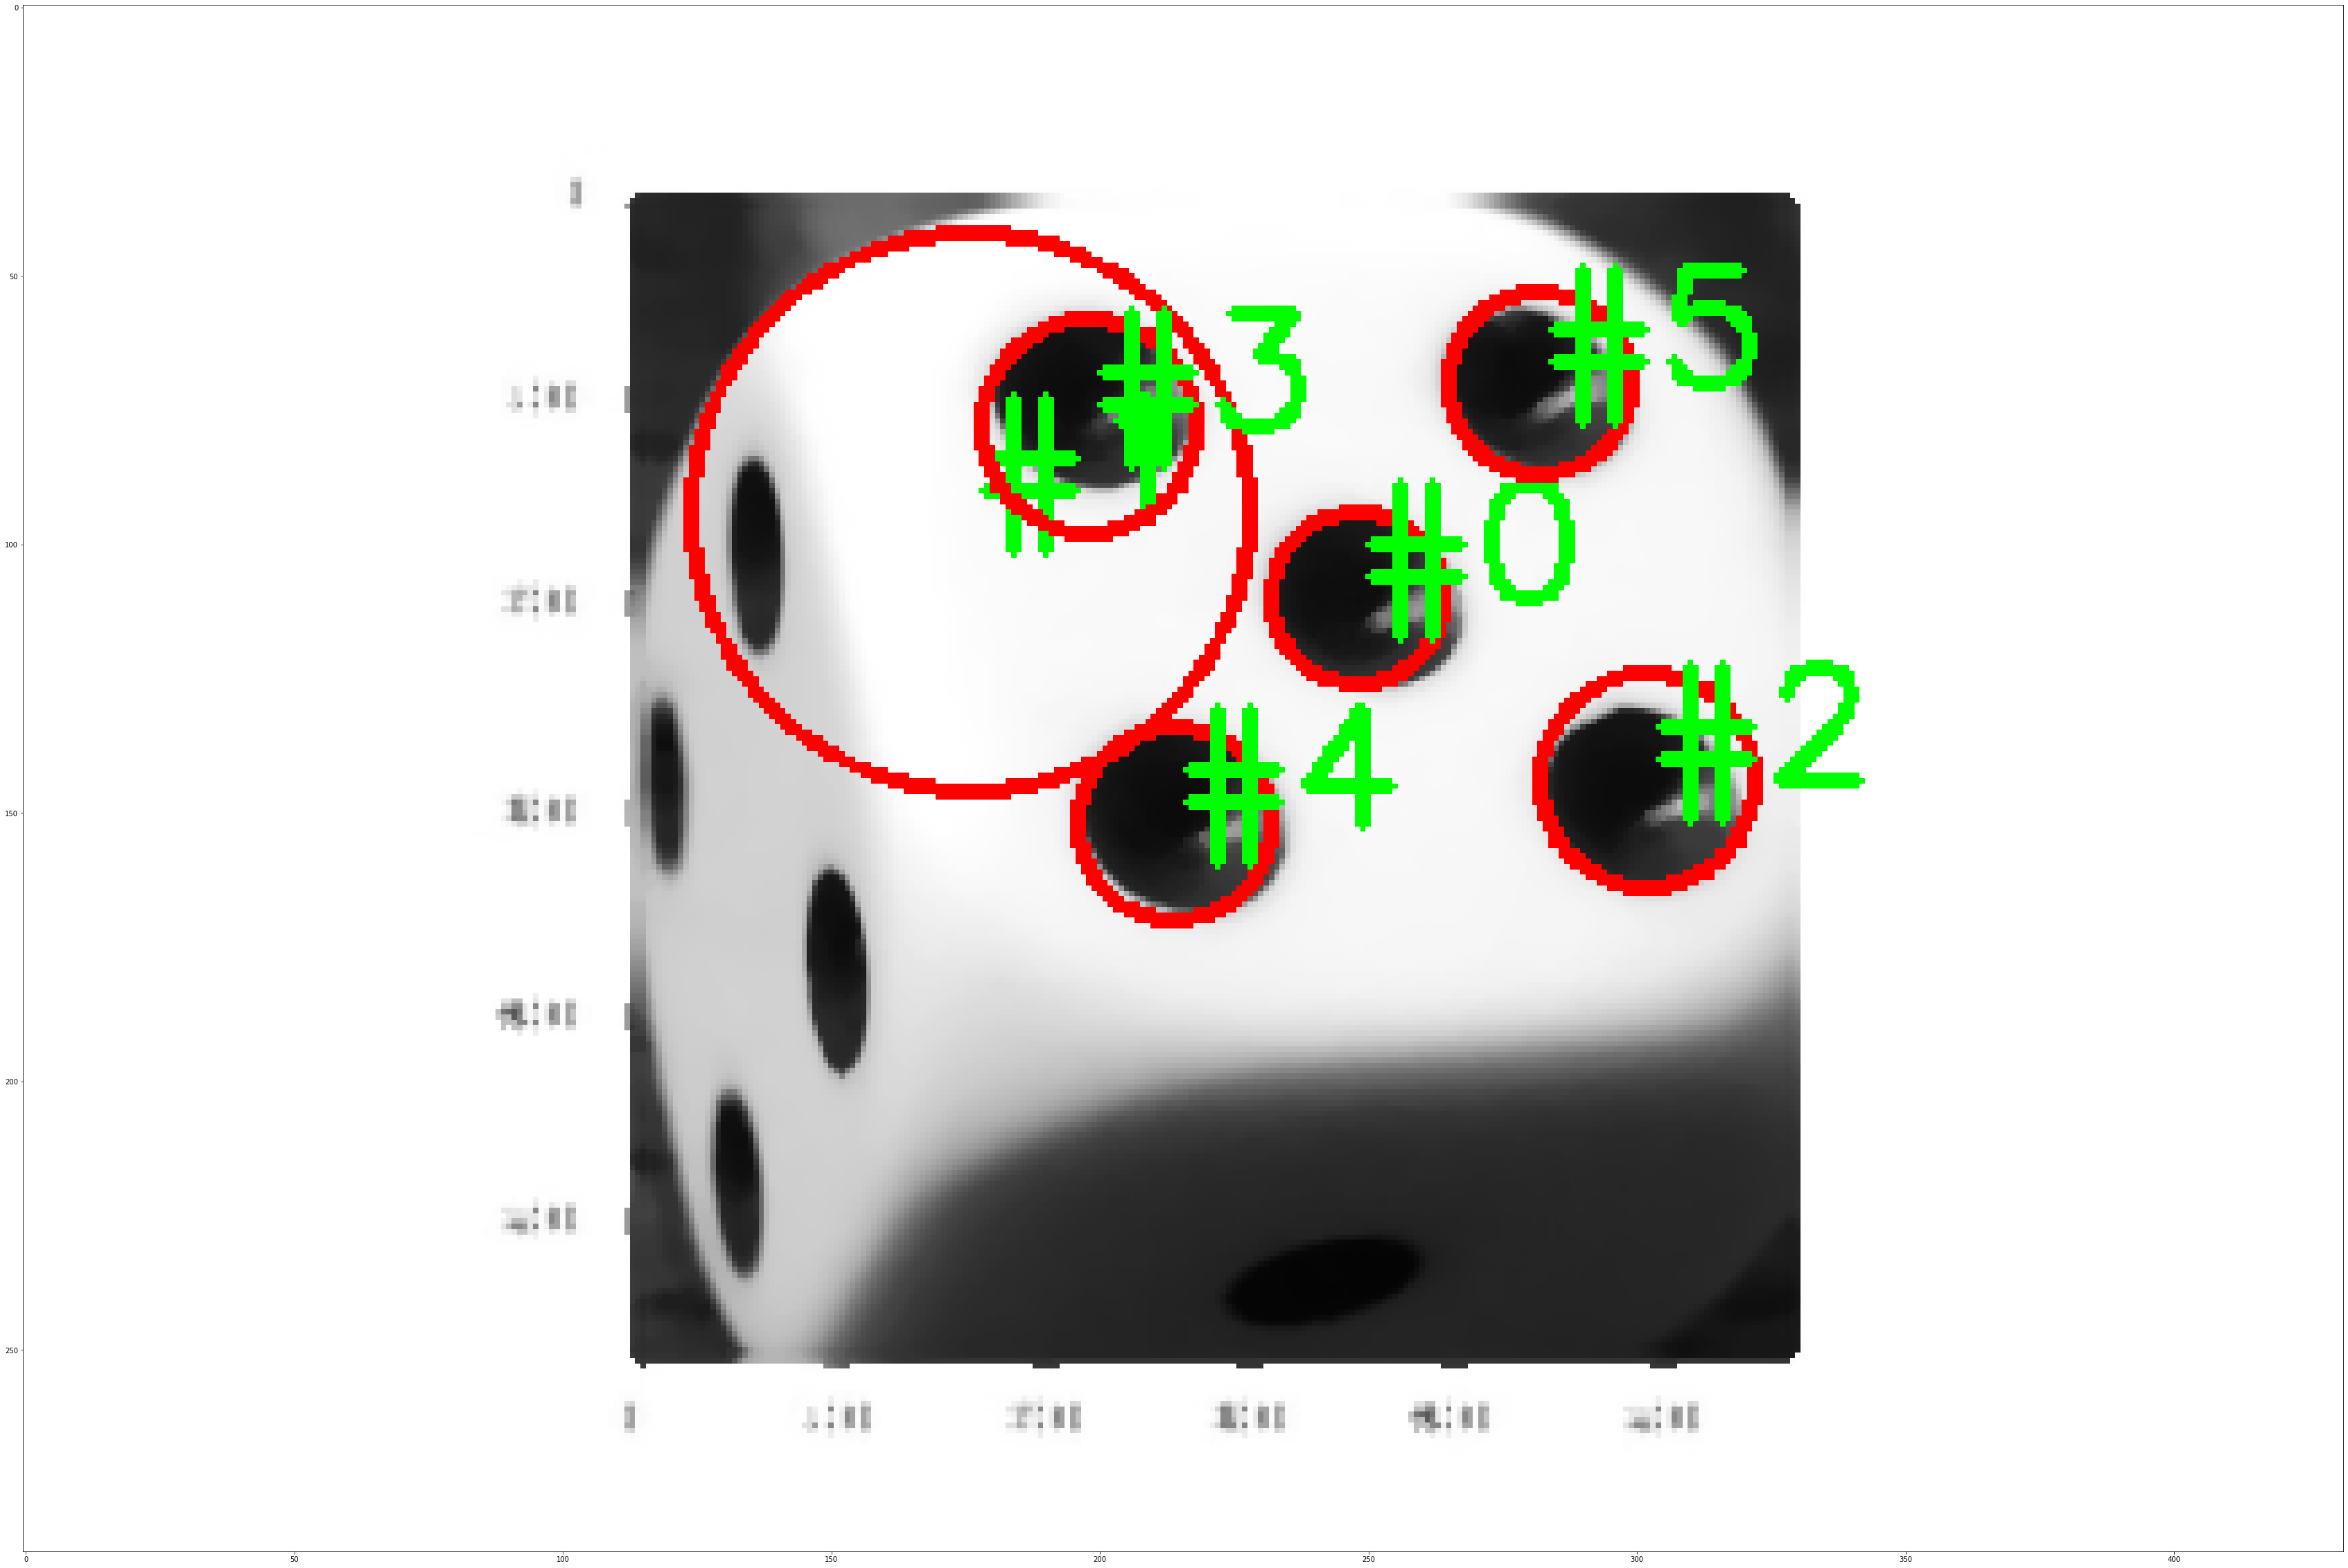

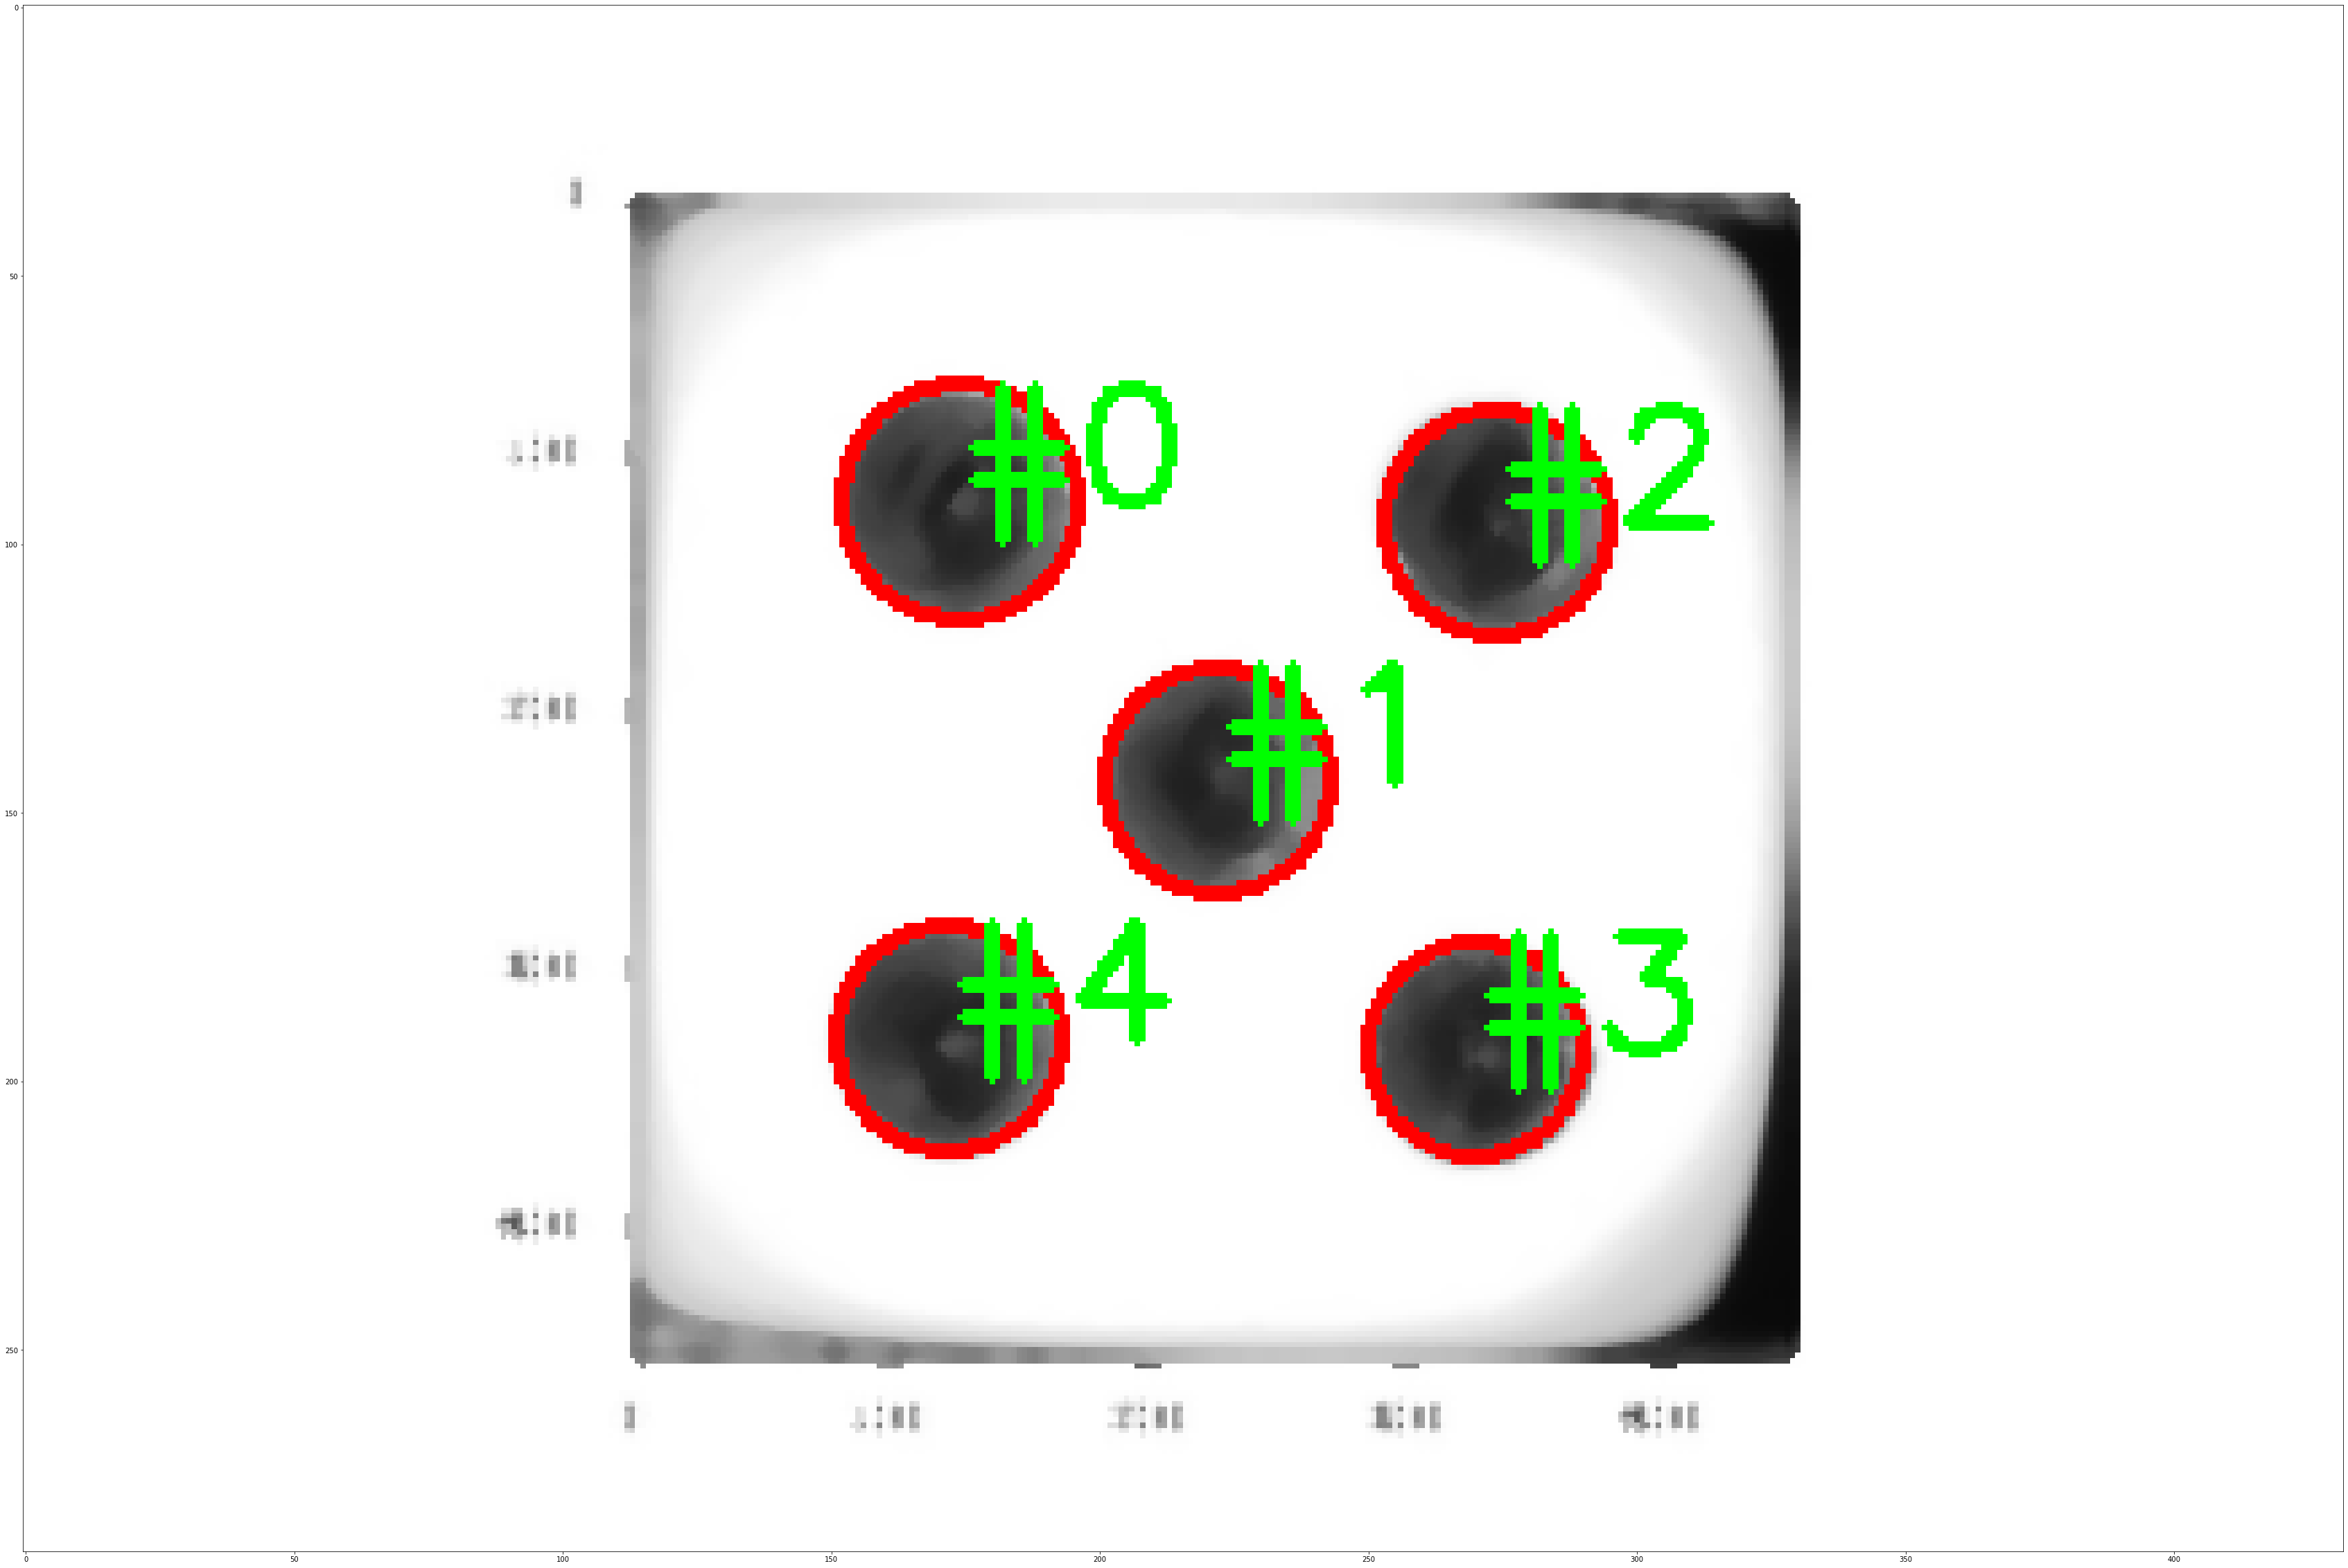

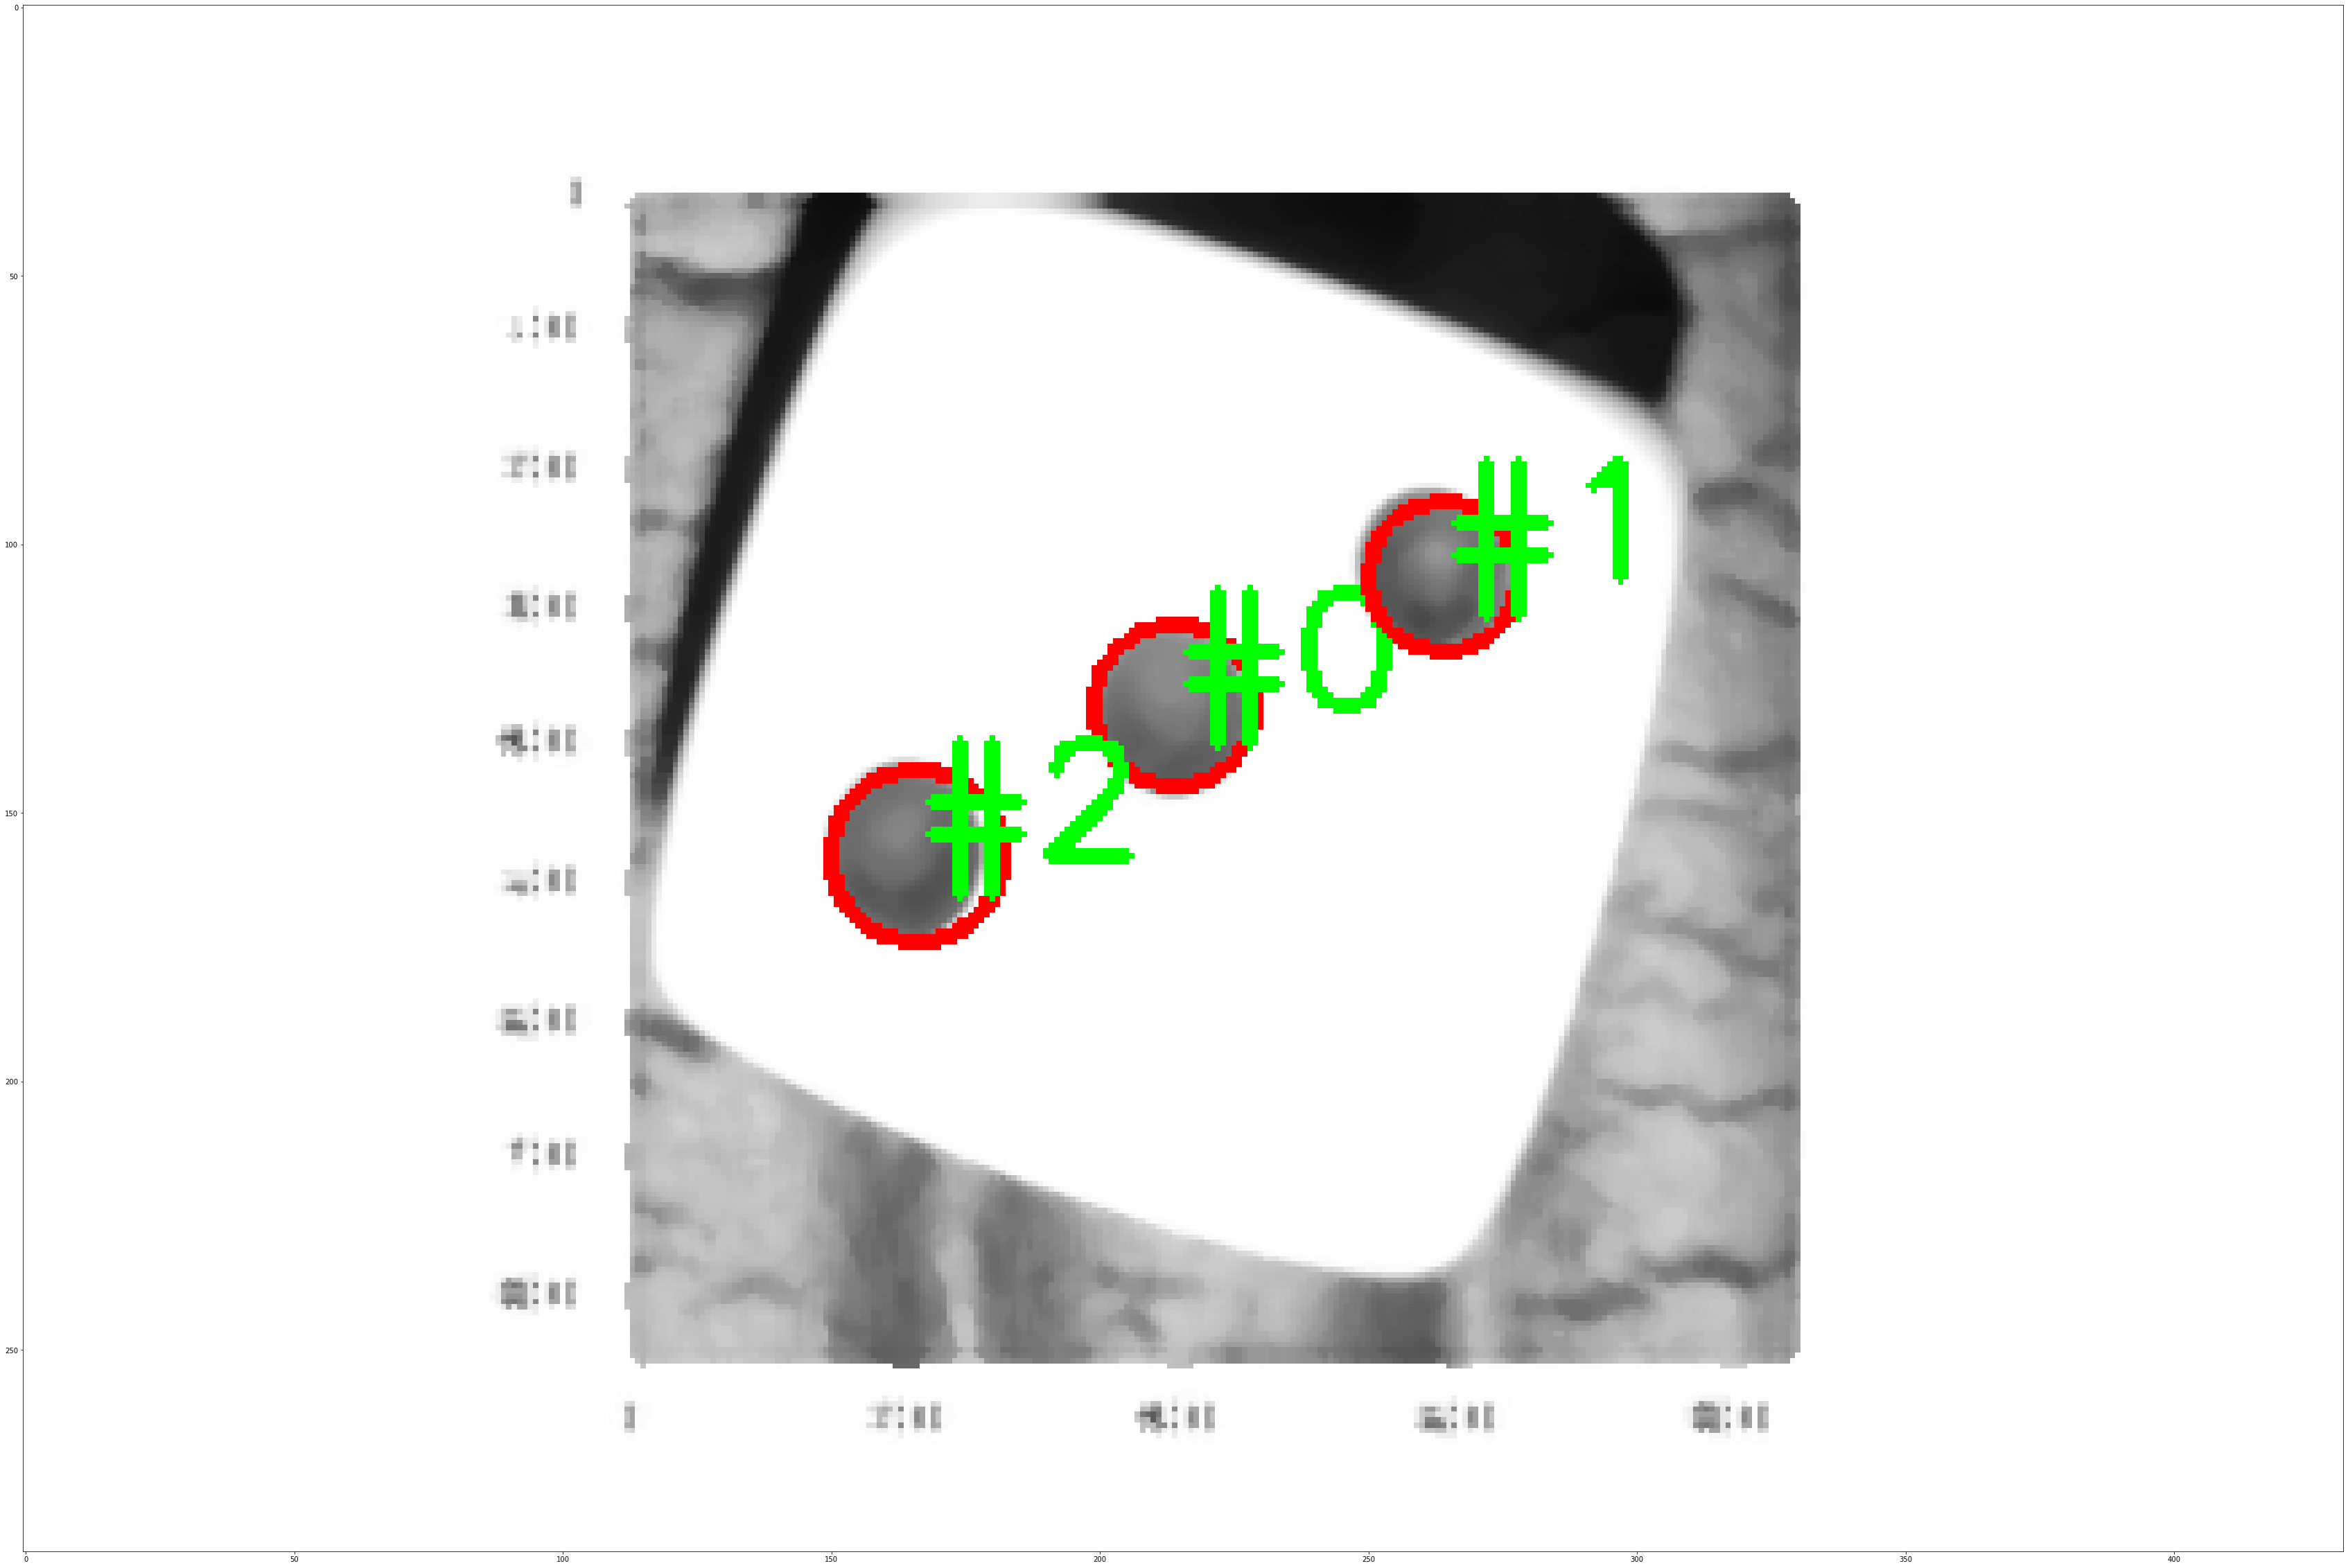

In [31]:
oczka = []
for i in range(0, 9):
    oczka.append('oczka{}.jpg'.format(i))
print(oczka)
for i in range(0, len(oczka)):
    DrawOczka(oczka[i], i)

In [ ]:
img = cv.imread('../zoomed/zooms.jpg', 0)
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)

circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=300,param2=25,minRadius=0,maxRadius=60)
circles = np.uint16(np.around(circles))
print(len(circles[0]))
font = cv.FONT_HERSHEY_SIMPLEX
j = 0
print(circles)
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(255,0,0),2)
    # draw the center of the circle
    #cv.circle(cimg,(i[0],i[1]),2,(255,0,0),3)
    bottomLeftCornerOfText = (i[0], i[1])
    fontScale = 1
    fontColor = (0, 255, 0)
    lineType = 2
    output = ('#{}'.format(j))
    cv.putText(cimg, output, bottomLeftCornerOfText, font, fontScale,fontColor,lineType)
    j+=1
    
figure(figsize=(60,60))
plt.imshow(cimg)
plt.savefig("../zoomed/oczka.jpg")

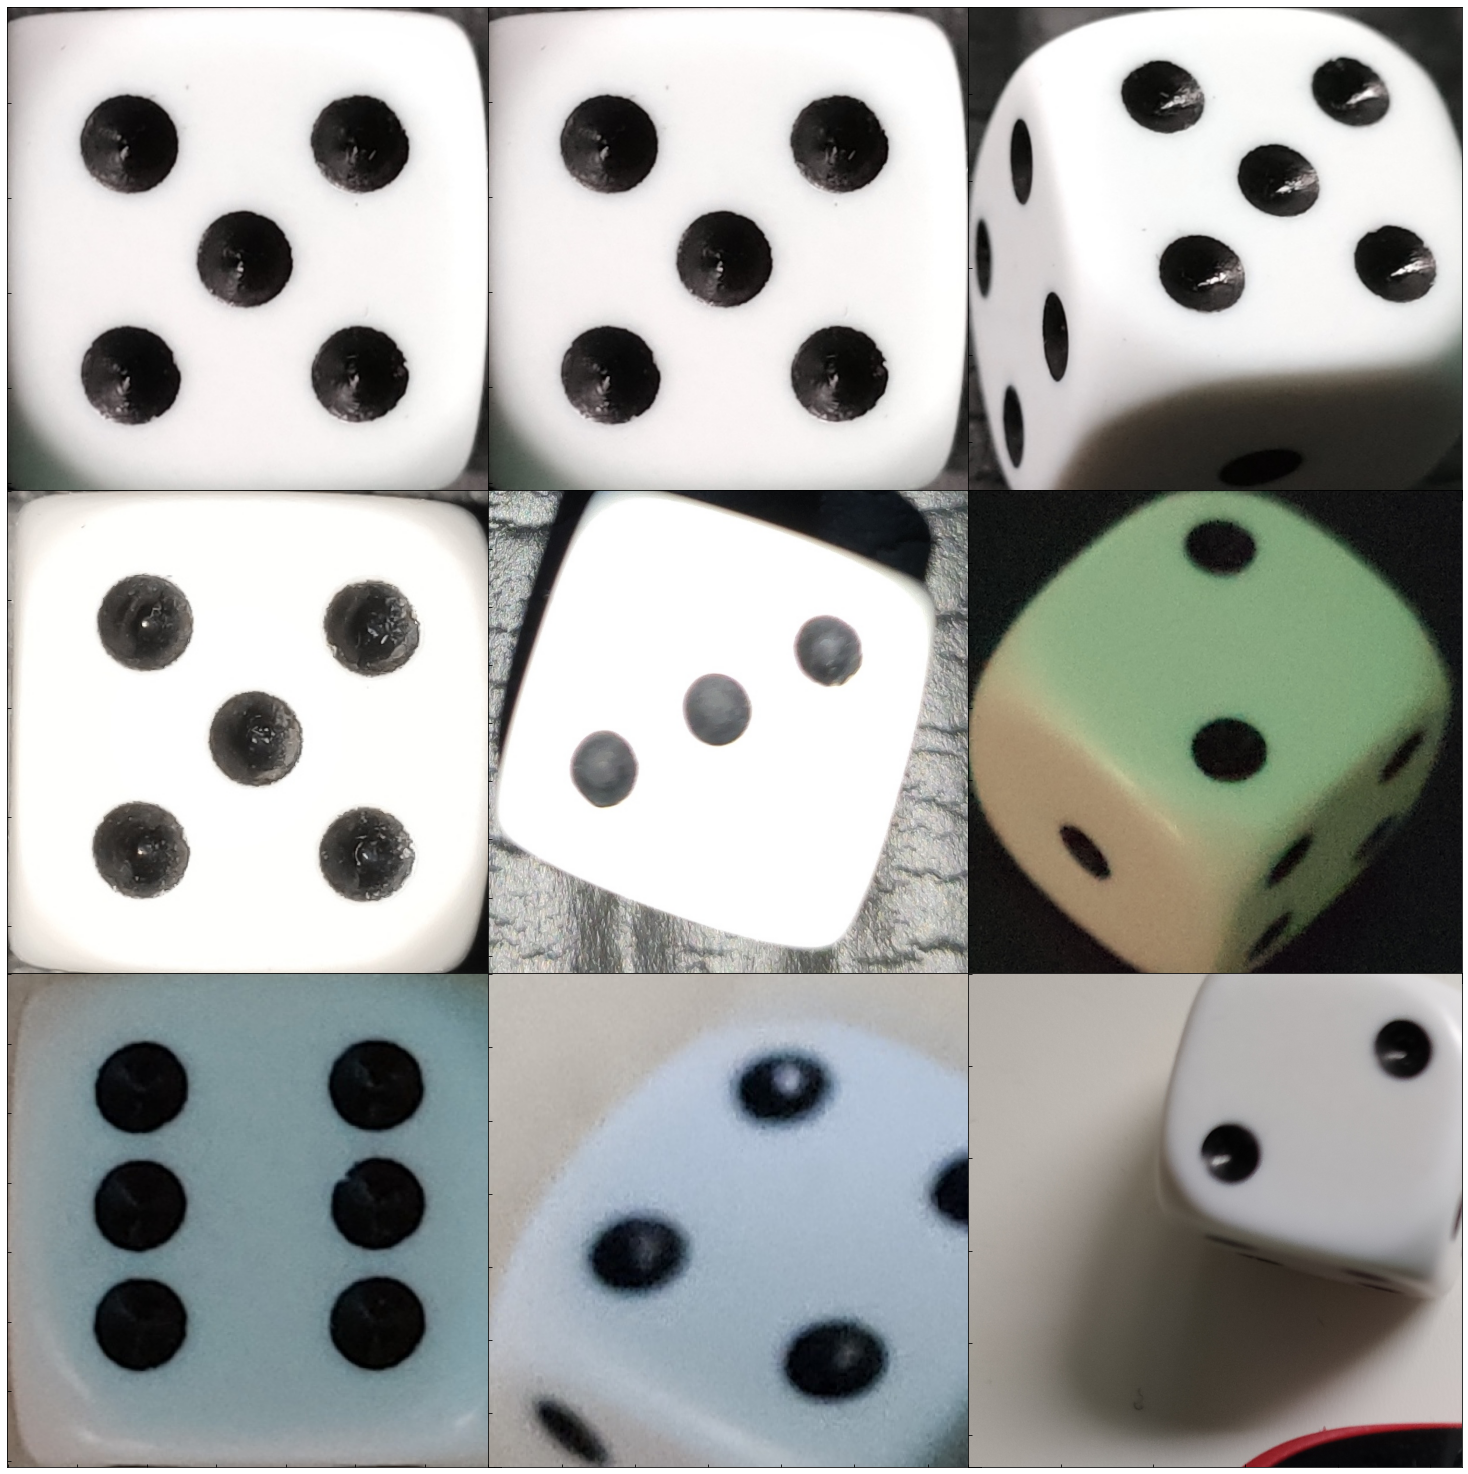

In [27]:
latwe0 = Load.imgio('latwe0')
latwe1 = Load.imgio('latwe1')
latwe2 = Load.imgio('latwe2')
latwe3 = Load.imgio('latwe3')
latwe4 = Load.imgio('latwe4')
latwe5 = Load.imgio('latwe5')
latwe6 = Load.imgio('latwe6')
latwe7 = Load.imgio('latwe7')
latwe8 = Load.imgio('latwe8')
latwe9 = Load.imgio('latwe9')

latwe0_zoomed = zoom(latwe0,170)
latwe1_zoomed = zoom(latwe1,170)
latwe2_zoomed = zoom(latwe2,170)
latwe3_zoomed = zoom(latwe3,170)
latwe4_zoomed = zoom(latwe4,170)
latwe5_zoomed = zoom(latwe5,100)

latwe7_zoomed = zoom(latwe7,140)
latwe8_zoomed = zoom(255-latwe8,63) #63
latwe9_zoomed = zoom(latwe9,148)

figure(figsize=(20,20))

ax = subplot(3,3,1)
ax.tick_params(direction='in',labelleft=False, labelbottom = False, labelright = False)
plt.imshow(latwe0_zoomed[0])
ax = subplot(3,3,2)
ax.tick_params(direction='in',labelleft=False, labelbottom = False, labelright = False)
plt.imshow(latwe1_zoomed[0])
ax = subplot(3,3,3)
ax.tick_params(direction='in',labelleft=False, labelbottom = False, labelright = False)
plt.imshow(latwe2_zoomed[0])
ax = subplot(3,3,4)
ax.tick_params(direction='in',labelleft=False, labelbottom = False, labelright = False)
plt.imshow(latwe3_zoomed[0])
ax = subplot(3,3,5)
ax.tick_params(direction='in',labelleft=False, labelbottom = False, labelright = False)
plt.imshow(latwe4_zoomed[0])
ax = subplot(3,3,6)
ax.tick_params(direction='in',labelleft=False, labelbottom = False, labelright = False)
plt.imshow(latwe5_zoomed[0])

ax = subplot(3,3,7)
ax.tick_params(direction='in',labelleft=False, labelbottom = False, labelright = False)
plt.imshow(latwe7_zoomed[0])
ax = subplot(3,3,8)
ax.tick_params(direction='in',labelleft=False, labelbottom = False, labelright = False)
plt.imshow(255-latwe8_zoomed[0])
ax = subplot(3,3,9)
ax.tick_params(direction='in',labelleft=False, labelbottom = False, labelright = False)
plt.imshow(latwe9_zoomed[0])

plt.tight_layout(pad=-1.0)

plt.savefig("../zoomed/zooms.jpg")



31
[[[ 114  126   49]
  [ 594  126   49]
  [ 824  358   48]
  [ 346  356   48]
  [ 362 1068   47]
  [ 126 1188   46]
  [ 126 1308   47]
  [ 364 1306   47]
  [ 364 1186   46]
  [ 114  358   48]
  [ 230  240   46]
  [ 594  358   49]
  [ 346  126   50]
  [ 824  128   47]
  [ 128  832   50]
  [ 708  242   48]
  [ 128 1072   48]
  [ 356  610   47]
  [ 352  836   45]
  [1378  244   36]
  [ 702  696   33]
  [1216 1136   29]
  [1388 1032   28]
  [ 814  634   35]
  [1182  254   38]
  [1258  160   34]
  [ 134  606   51]
  [ 590  752   35]
  [ 240  720   44]
  [1150   74   42]
  [1342   64   44]]]


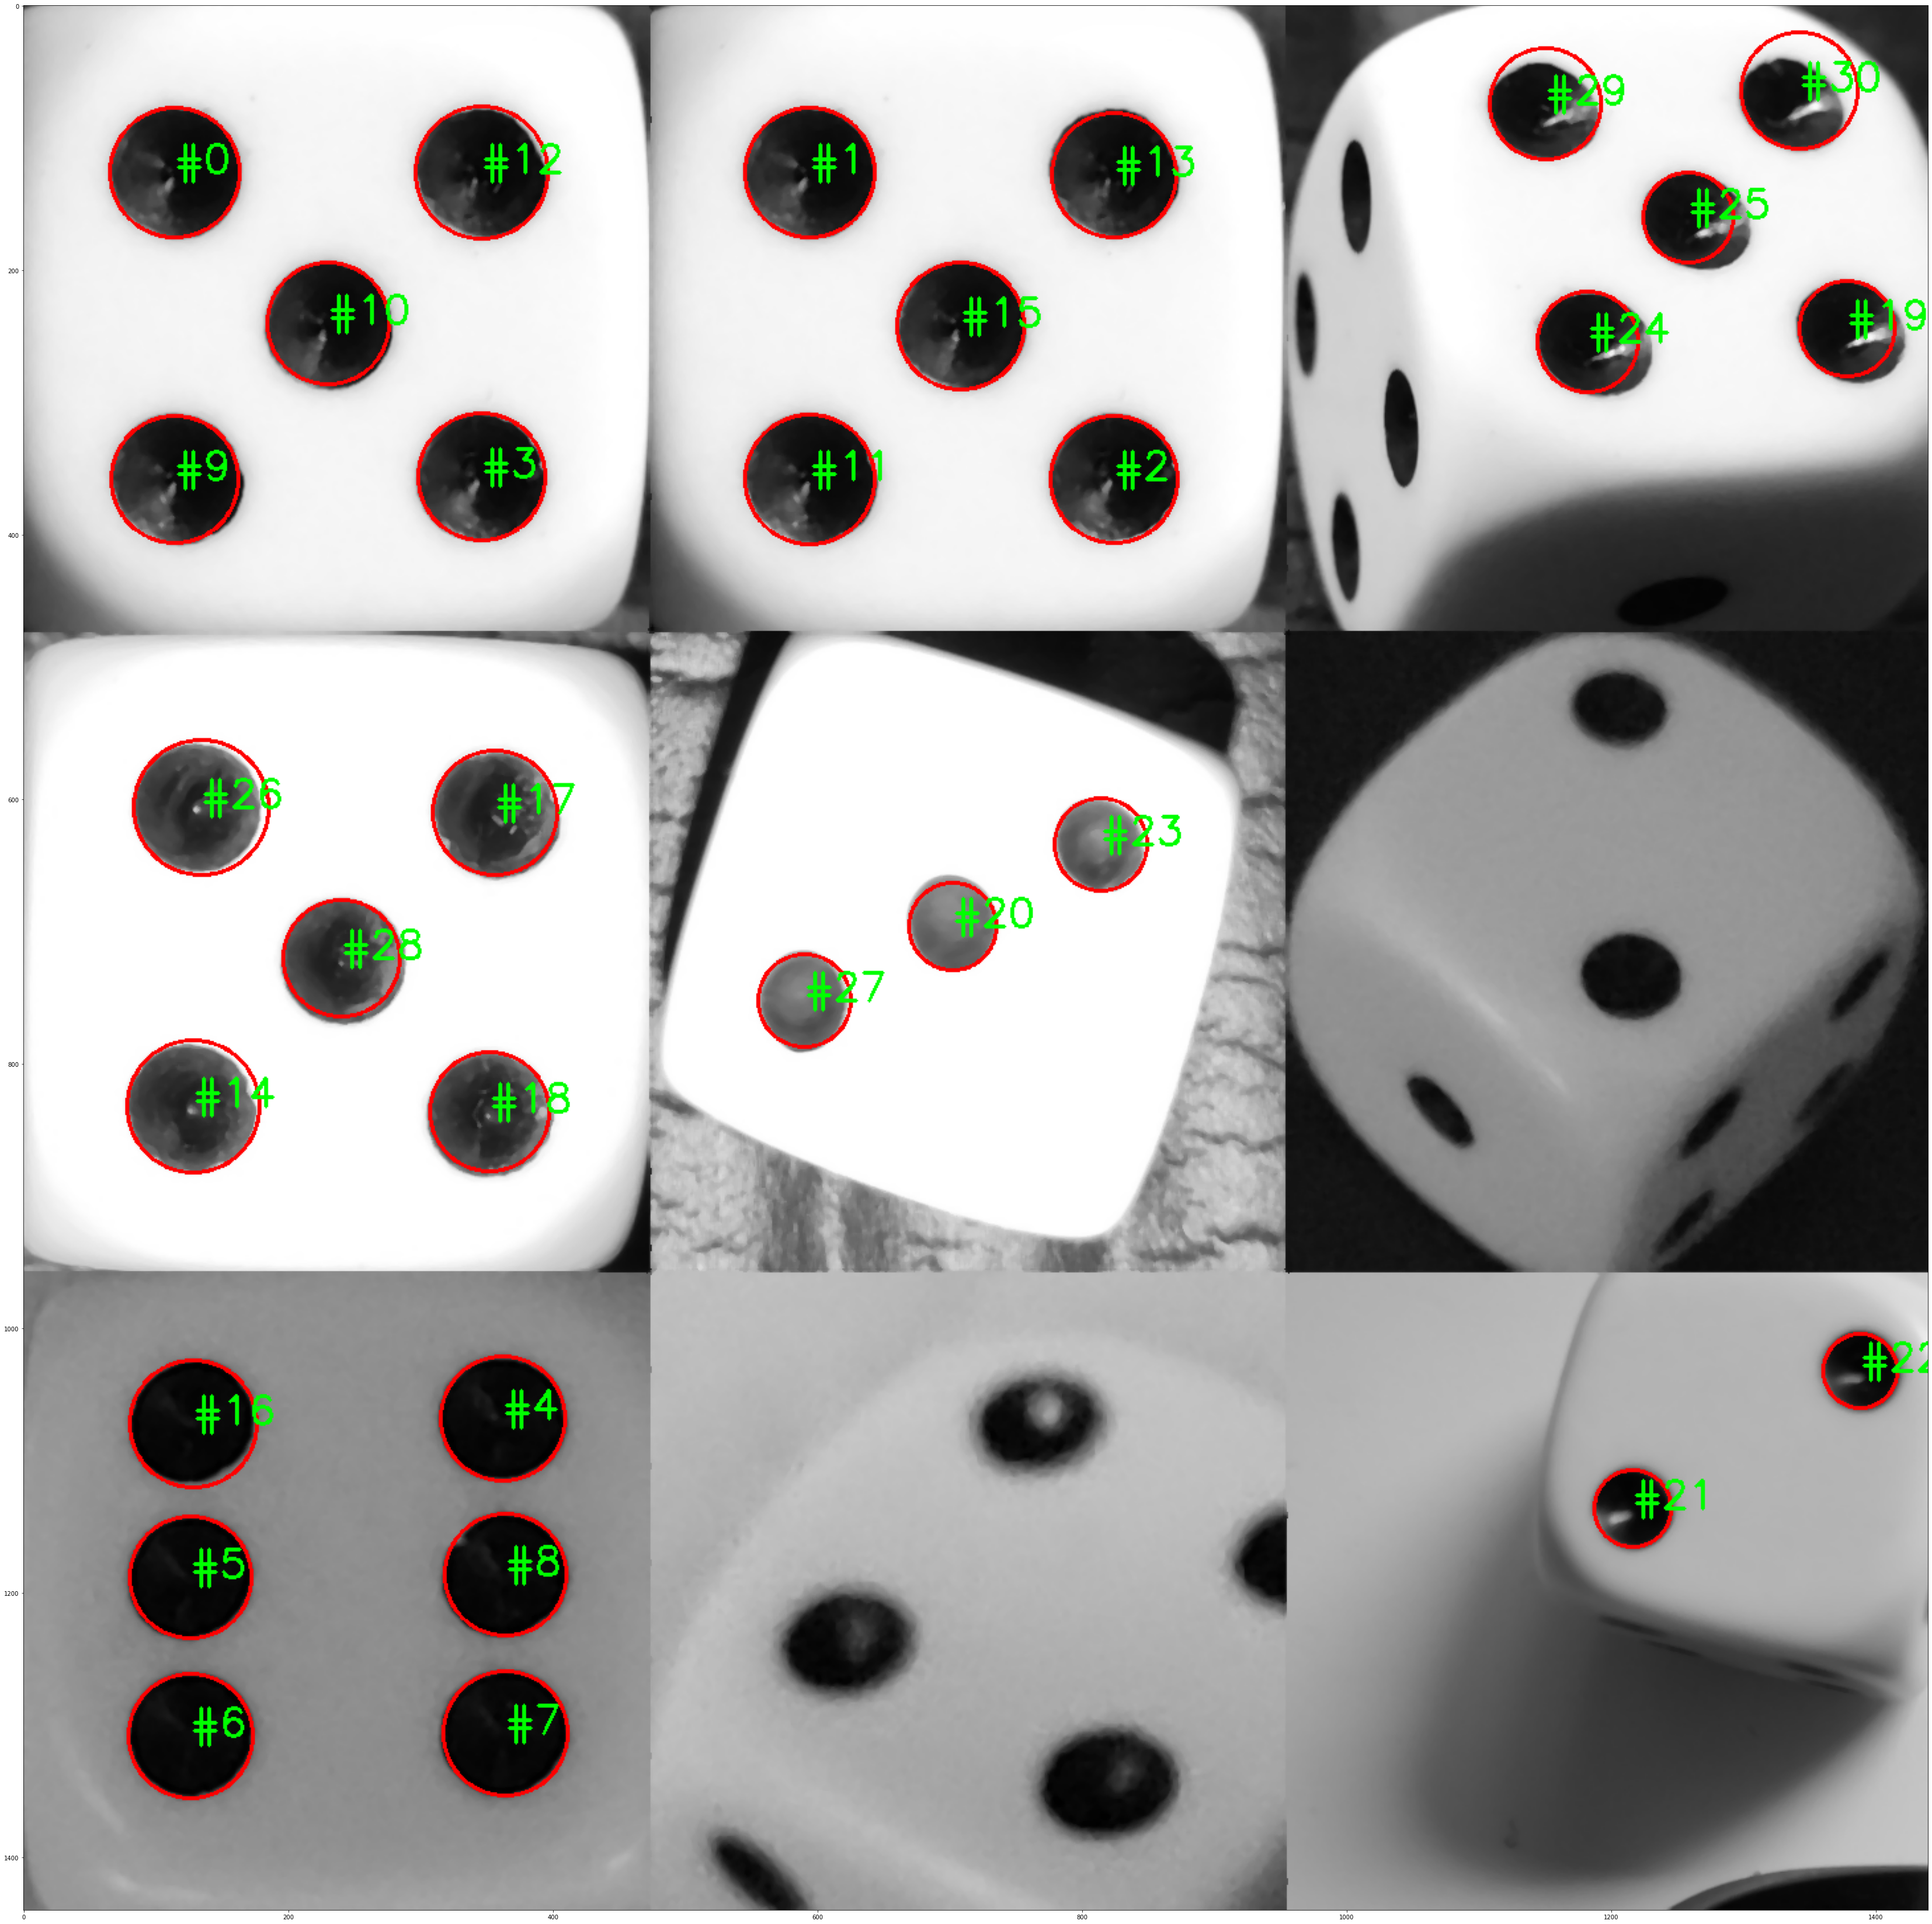

In [28]:
img = cv.imread('../zoomed/zooms.jpg', 0)
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)

circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=300,param2=25,minRadius=0,maxRadius=60)
circles = np.uint16(np.around(circles))
print(len(circles[0]))
font = cv.FONT_HERSHEY_SIMPLEX
j = 0
print(circles)
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(255,0,0),2)
    # draw the center of the circle
    #cv.circle(cimg,(i[0],i[1]),2,(255,0,0),3)
    bottomLeftCornerOfText = (i[0], i[1])
    fontScale = 1
    fontColor = (0, 255, 0)
    lineType = 2
    output = ('#{}'.format(j))
    cv.putText(cimg, output, bottomLeftCornerOfText, font, fontScale,fontColor,lineType)
    j+=1
    
figure(figsize=(60,60))
plt.imshow(cimg)
plt.savefig("../zoomed/oczka.jpg")

In [ ]:
#INNE SPOSOBY

In [ ]:
def count_blobs(image):
    params = cv.SimpleBlobDetector_Params()
    params.filterByColor = True
    params.blobColor = 255
    params.minArea = 500
    # Disable the default settings
    params.filterByInertia = False
    params.filterByConvexity = False
    detector = cv.SimpleBlobDetector_create(params)
    keypoints = detector.detect(image)
    im_with_keypoints = cv.drawKeypoints(
        image, keypoints, np.array([]), (0,0,255),
        cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )
    return keypoints, im_with_keypoints

def threshold(img_in, value):
    img_out = img_in.copy()
    map, img_out = cv.threshold(img_out, value, 255, cv.THRESH_BINARY)
    return img_out

In [ ]:
#latwe0 threshold(latwe0, 85)
#latwe1 threshold(255-latwe0, 150)
#latwe2 threshold(latwe0, 50)
#latwe3 threshold(latwe0, 60)
#latwe4 threshold(latwe0, 208)
#latwe5 threshold(latwe0, 140)
#latwe6 za ciemne
#latwe7 threshold(latwe0, 93)
#latwe8 threshold(latwe0, 93)
#latwe9 threshold(255-latwe0, 130)

latwe0 = Load.imgcv("projekt18")

threshold_image = threshold(255-latwe0, 150)

blobs, kp_image = count_blobs(threshold_image)
print("Number of Pips: " + str(len(blobs)))

plt.imshow(threshold_image, cmap='gray')